# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Monday, 08.06.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you five projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2019 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to your tutor.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2017-2019. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

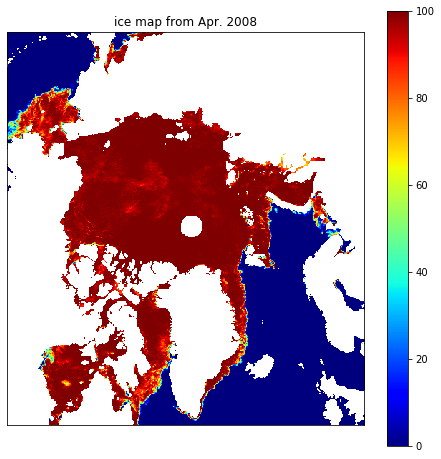

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load ice data on the day 2008-04-15
data=np.load('/home/shared/Project_2/ice_data/20080415.npy')

#create a figure
fig=plt.figure(figsize=(8,8))

#set title of the plot
plt.title('ice map from Apr. 2008')

#visualize the 2d array
plot=plt.imshow(data,cmap=plt.cm.jet,origin='lower')

#eliminate the ticks
plt.tick_params(
    axis='both',       # changes apply to the x- and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # ticks along the left edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)   # labels along the left edge are off

#show colorbar
fig.colorbar(plot)



In [2]:
import glob

#create a list of files that can be iterated over
files=sorted(glob.glob('/home/shared/Project_2/ice_data/*.npy'))

#create objects that will store data on various days
datas=[]
above_halfs=np.array([])
times=np.array([])

#loop over files
for file in files:
    
    #put the 2d array into 'data' and append it onto the list 'datas'
    data=np.load(file)
    datas.append(data)
    
    #calculate the number of pixels with above 50% ice and append it onto the array 'above_halfs'
    above_half=len(data[data>50])
    above_halfs=np.append(above_halfs,above_half)
    
    #extract date information suing string operations
    date=file.split('/')[5].split('.')[0]
    year=int(date[:4])
    month=int(date[4:6])
    day=int(date[-2:])
    
    #calculate 'time' and append it onto the array 'times'
    time=year+(month-1)/12.0+(day-1)/360.0
    times=np.append(times,time)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


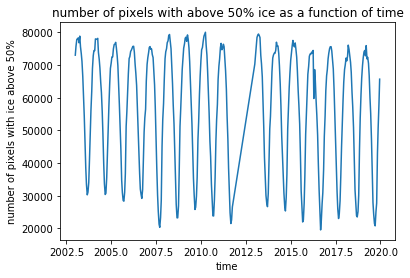

In [3]:
#plot the number of pixels with above 50% ice as a function of time
plt.plot(times,above_halfs)

#set x and y axis
plt.xlabel('time')
plt.ylabel('number of pixels with ice above 50%')

#set title
plt.title('number of pixels with above 50% ice as a function of time')

plt.show()

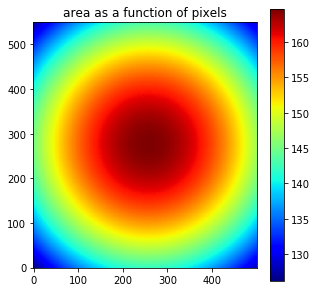

In [4]:
#load the file into an array called 'area'
area=np.load('/home/shared/Project_2/ice_data_area.npy')

#create a figure
fig=plt.figure(figsize=(5,5))

#set title
plt.title('area as a function of pixels')

#plot the 2d array using color scheme 'jet'
plot=plt.imshow(area,cmap=plt.cm.jet,origin='lower')

#show colorbar
fig.colorbar(plot)

In [5]:
#create two empty arrays to store numbers
area_99s=np.array([])
total_areas=np.array([])

#loop over all files 
for file in files:
    
    #load the file into a 2d array
    data=np.load(file)
    
    #calculate the area that has ice above 99%
    area_99=sum(area[data>99])
    
    #caluclate the total area covered by ice. data/100 give the percentage of that pixel having ice.
    total_area=sum(area[data>0]*data[data>0]/100)
    
    #append them onto the two arrays
    area_99s=np.append(area_99s,area_99)
    total_areas=np.append(total_areas,total_area)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


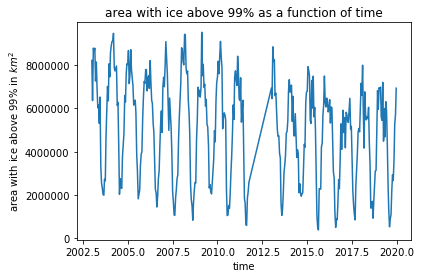

In [6]:
#plot the area with ice above 99% against time
plt.plot(times,area_99s)

#set x and y axis
plt.xlabel('time')
plt.ylabel('area with ice above 99% in $km^2$')

#set title
plt.title('area with ice above 99% as a function of time')
plt.show()

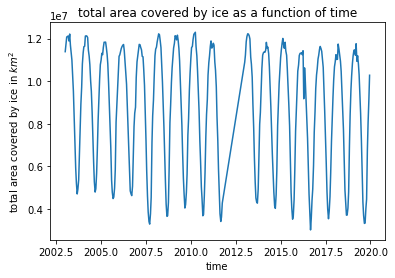

In [7]:
#plot the area covered by ice against time
plt.plot(times,total_areas)

#set x and y axis
plt.xlabel('time')
plt.ylabel('total area covered by ice in $km^2$')

#set title
plt.title('total area covered by ice as a function of time')
plt.show()

The minimum area always occurs in summer every year, and over time it also decreases, indicating that the area covered by ice is decreasing over the years.

In [8]:
#find the index of minimum ice_covered area in the array 'total_areas'
min_index=np.argmin(total_areas)

#pass this index to 'times' to find the day with minimum ice_covered area
min_date=times[min_index]

#print the date to know which day it is
print(min_date)

2016.6666666666667


Now we know we can go to the same day in 2003 by subtracting min_date by 13

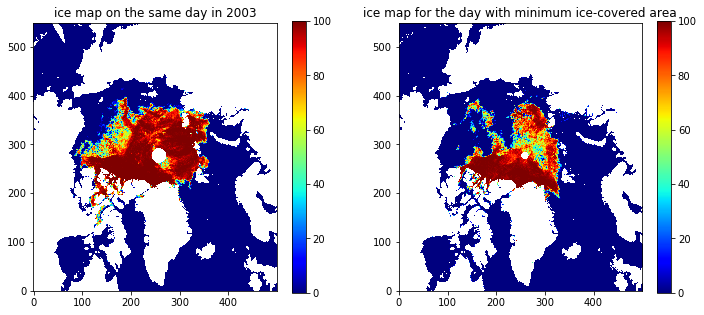

In [9]:
#pass the index to 'min_data' to get the ice map on that day
min_data=datas[min_index]

#get the ice map on the same day in 2003 by looking for the index of times==min_date-13
same_day_2003=datas[np.where(times==(min_date-13))[0][0]]

#create 1 figure, 2 axis
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#plot for the first axis
plot1=ax1.imshow(same_day_2003,cmap=plt.cm.jet,origin='lower')

#set title and show colorbar for the first axis
ax1.set_title('ice map on the same day in 2003')
fig.colorbar(plot1,ax=ax1)

#plot for the second axis
plot2=ax2.imshow(min_data,cmap=plt.cm.jet,origin='lower')

#set title and show colorbar for the second axis
ax2.set_title('ice map for the day with minimum ice-covered area')
fig.colorbar(plot2,ax=ax2)

#show plots
plt.show()

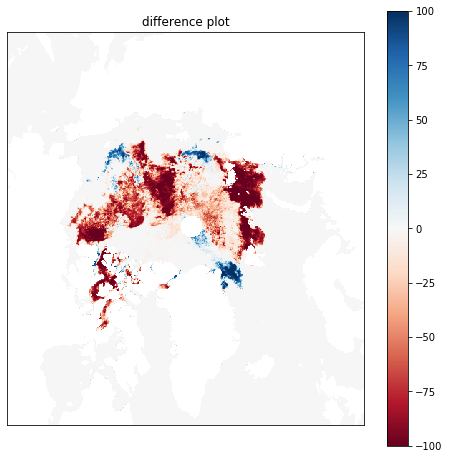

In [10]:
#create a figure
fig=plt.figure(figsize=(8,8))

#set title
plt.title('difference plot')

#plot the difference using 'RdBu' color scheme
plot=plt.imshow(min_data-same_day_2003,cmap=plt.cm.RdBu,origin='lower')

#eliminate ticks
plt.tick_params(
    axis='both',       # changes apply to the x- and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # ticks along the left edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)   # labels along the left edge are off

#show colorbar
fig.colorbar(plot)

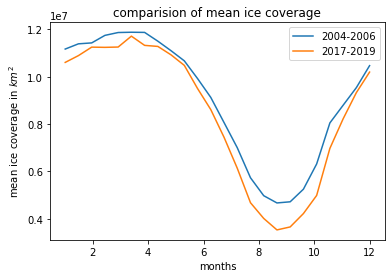

In [11]:
#select years 2004, 2005 and 2006 and put them into 3 rows
before=total_areas[(times>=2004)*(times<2007)].reshape(3,24)

#calculate the mean over these 3 years for each observation
means_before=np.mean(before,axis=0)

#find the minimum value
min_before=np.min(means_before)

#select years 2017, 2018 and 2019 and put them into 3 rows
after=total_areas[(times>=2017)*(times<2020)].reshape(3,24)

#calculate the mean over these 3 years for each observation
means_after=np.mean(after,axis=0)

#find the minimum value
min_after=np.min(means_after)

#put the calculated means into 2 rows
means=np.concatenate((means_before,means_after)).reshape((2,24))

#plot the two rows against the months
lines=plt.plot(np.linspace(1,12,24),np.transpose(means))

#set x and y axis
plt.xlabel('months')
plt.ylabel('mean ice coverage in $km^2$')

#set title
plt.title('comparision of mean ice coverage')

#set legends for each row
plt.legend(lines,['2004-2006','2017-2019'])

#show plot
plt.show()

In [12]:
#calculate the loss in yearly minimum of ice-covered area 
print(min_before-min_after)


1138592.9845468872
